In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.append('src/')
import main

1.	**Your name**:

    Xiuwen Zhang

2.	**Any major “gotchas” to the code**
    
    My first data source (villagers' ranking) and the third data source (forum posts) are changing on the websites overtime. The following cell is to get data remotely, process, and store the processed data in the data folder. The purpose of doing this is to get data updated to the newest. However, it's not necessary to run the following cell since the minor changes won't affect the results too much. If you choose to run the following cell, it takes 10-15 minutes. 

In [2]:
raw_data = main.get_data_remotely(page=925)
modeled_data = main.model_data(raw_data)
main.store_data(modeled_data)

get raw_characters_ranking from remote source and update to local succesfully

get raw_villagers_info from remote source and update to local succesfully

Starting to get forum_posts_raw from remote source ...
This takes 10-15 minutes! Take a break!

get raw_forum_posts from remote source and update to local succesfully

data have been updated and stored as csv files in the 'data' folder



3.  **Any libraries that need to be installed to run your code**

    I believe all the libraries I used are installed along with Anaconda. 
    However, the Seaborn library need to be updated to the newest version (0.11.0) if necessary. 
    (It wasn't the newest version when I installed it and it may cause error if it's not the newest.) 

4.  **Anything else you feel is relevant to the grading of your project your project**

    I've changed two data sources during milestone 2 so they are different from what I wrote in milesotone 1. 
    
    For the first data source (villagers' ranking), I changed the previous website to another website where the tier list is generated based on more players' votes (105383 collected), and the ranking is updating every month. 
    
    For the third data source (used to be prices for trading villagers), I changed the data to be forum posts count. I scraped the villagers' trading section (925 pages in total) of "The Bell Tree Forums" website, and counted how many times is each villager mentioned in the titles of all the posts. 

5. **What did you set out to study?**

     (1) I would like to know the relations between each feature of villagers and villagers' popularity. 
  
     (2) I would like to know what villagers do players mention and trade more in the forum, and whether it is related to the villagers' ranking. This is different from what I wrote in milestone 1 because of changing data. 

In [3]:
# load the data from the 'data' folder
df_ranking = pd.read_csv('data/villagers_ranking.csv')
df_info = pd.read_csv('data/villagers_info.csv')
df_count = pd.read_csv('data/posts_count.csv')

**(1) Relations between features and popularity (ranking)**

In [4]:
# merge villagers' features into villagers' ranking dataframe
df = df_ranking.merge(df_info)
df.head()

,name,ranking,species,personality,gender,sign
0,Raymond,1,Cat,Smug,Male,Libra
1,Marshal,2,Squirrel,Smug,Male,Libra
2,Marina,3,Octopus,Normal,Female,Cancer
3,Zucker,4,Octopus,Lazy,Male,Pisces
4,Sherb,5,Goat,Lazy,Male,Capricorn


**a. ranking  vs. villager's species**

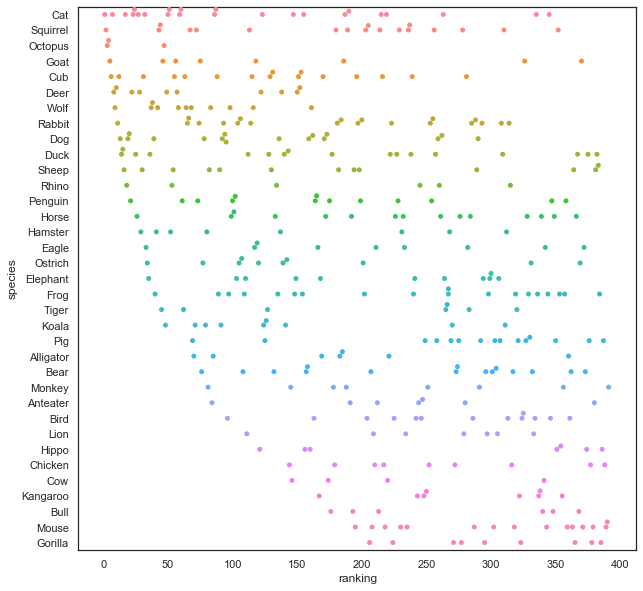

In [5]:
# plot species vs. ranking directly
sns.set_theme(style="white")
plt.figure(figsize=(10, 10))
sns.swarmplot(x='ranking', y='species', data=df)
plt.show()

Alligator: 181.85714285714286
Anteater: 234.0
Bear: 244.66666666666666
Bird: 266.53846153846155
Bull: 273.0
Cat: 117.52173913043478
Chicken: 261.6666666666667
Cow: 220.25
Cub: 127.25
Deer: 73.6
Dog: 128.875
Duck: 186.2941176470588
Eagle: 208.33333333333334
Elephant: 206.27272727272728
Frog: 235.1578947368421
Goat: 147.75
Gorilla: 302.6666666666667
Hamster: 143.75
Hippo: 271.7142857142857
Horse: 225.6
Kangaroo: 282.5
Koala: 140.11111111111111
Lion: 252.57142857142858
Monkey: 235.125
Mouse: 305.8
Octopus: 18.0
Ostrich: 162.5
Penguin: 172.84615384615384
Pig: 282.53333333333336
Rabbit: 180.7
Rhino: 170.83333333333334
Sheep: 184.07692307692307
Squirrel: 179.44444444444446
Tiger: 195.42857142857142
Wolf: 70.36363636363636


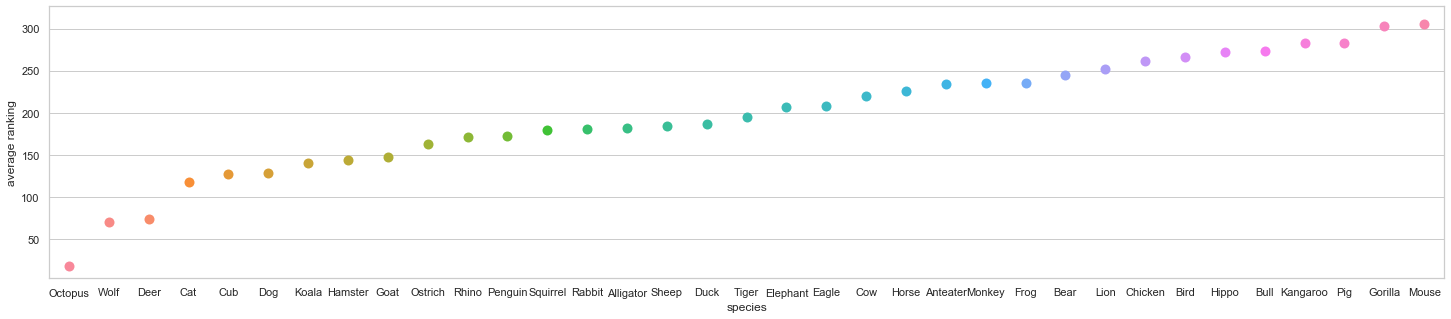

In [6]:
# plot average ranking vs. species
sns.set_theme(style="whitegrid")
sp_ranking_list = list()
for sp in df.groupby('species'):
    sp_dict = dict()
    sp_dict['species'] = sp[0]
    sp_dict['average ranking'] = sp[1]['ranking'].mean()
    sp_ranking_list.append(sp_dict)
    
    # print out each species: average ranking of that species
    print(f'{sp[0]}: {sp[1]["ranking"].mean()}')
    
df_sp_ranking = pd.DataFrame(sp_ranking_list)

plt.figure(figsize=(25, 5))
sns.swarmplot(x='species', y='average ranking', data=df_sp_ranking.sort_values('average ranking'), size=10)
plt.show()

6. **What did you Discover/what were your conclusions?**

    **(1) a.** From the first graph, cat, squirrel and octopus villagers take over the top 3, and bull, mouse, gorilla villagers are the bottom 3.
    
    However, the second graph with average ranking represents the relation between species and ranking better. The order of the first graph only reflects every single villager's ranking instead of the whole species. For example, even though the most popular villager is a cat, there are also cats that rank lower than 300. Only if every villager of a species ranks rather higher, that species is more popular than other species. 
    
    Thus, we can conclude that octopus, wolves and deers are the rather more popular species since their average rankings are much higher than other species. Even the least popular villager of these three species ranks higher than 200. In the contrary, gorillas and mouse are the least popular species. 

**b. ranking vs. villager's personality**

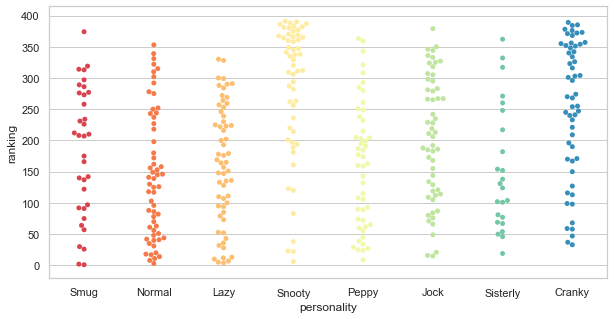

In [7]:
# plot ranking vs. personality directly
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.swarmplot(x='personality', y='ranking', data=df, palette='Spectral')
plt.show()

Cranky: 252.9090909090909
Jock: 202.85714285714286
Lazy: 161.98333333333332
Normal: 144.22033898305085
Peppy: 161.12244897959184
Sisterly: 152.41666666666666
Smug: 182.97058823529412
Snooty: 284.2


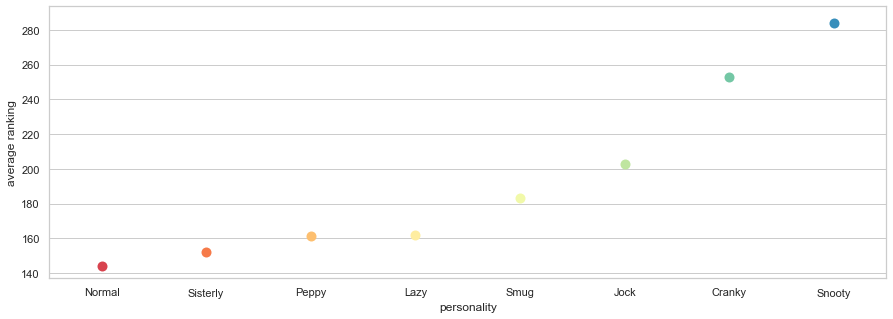

In [8]:
# plot average ranking vs. personality
sns.set_theme(style="whitegrid")
p_ranking_list = list()
for p in df.groupby('personality'):
    p_dict = dict()
    p_dict['personality'] = p[0]
    p_dict['average ranking'] = p[1]['ranking'].mean()
    p_ranking_list.append(p_dict)
    
    # print out each type of personality: average ranking of that type
    print(f'{p[0]}: {p[1]["ranking"].mean()}')
df_p_ranking = pd.DataFrame(p_ranking_list)

plt.figure(figsize=(15, 5))
sns.swarmplot(x='personality', y='average ranking', data=df_p_ranking.sort_values('average ranking'), size=10, palette='Spectral')
plt.show()

6. **What did you Discover/what were your conclusions?**

    **(1) b.** From the first graph, we can easily tell that the villagers of normal personalities are the most popular since there is a aggregation at a higher ranking of this type than other types of personalities. Similarly, snooty and cranky villagers are less popular than other types since there are more dots at low rankings for these two types of personalities. 
    
    The second graph of average ranking supports the conclusion from the first graph. 

**c. ranking vs. villager's gender**

Female: 190.8716577540107
Male: 201.02439024390245


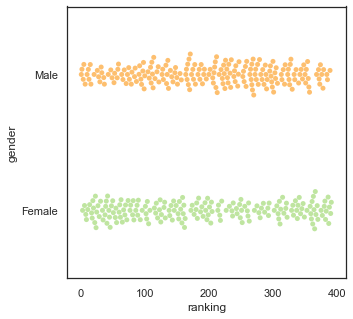

In [9]:
# plot ranking vs. villager's gender
sns.set_theme(style="white")

# print out gender: average ranking of this gender
for gender in df.groupby('gender'):
    print(f'{gender[0]}: {gender[1]["ranking"].mean()}')
plt.figure(figsize=(5, 5))
sns.swarmplot(x='ranking', y='gender', data=df, palette='Spectral')
plt.show()

6. **What did you Discover/what were your conclusions?**

    **(1) c.** The average ranking of male villagers are slightly higher than average ranking of female villagers, but there's no/ much difference between female and male. 

**d. ranking vs. villager's star sign**

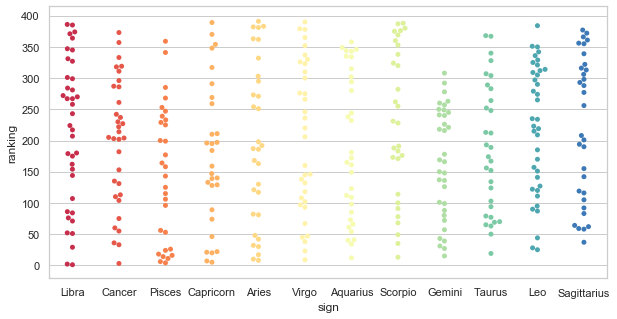

In [10]:
# plot ranking vs. star sign directly
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.swarmplot(x='sign', y='ranking', data=df, palette='Spectral')
plt.show()

Aquarius: 189.0625
Aries: 195.25806451612902
Cancer: 197.4848484848485
Capricorn: 174.10344827586206
Gemini: 165.47058823529412
Leo: 220.28947368421052
Libra: 215.07894736842104
Pisces: 146.33333333333334
Sagittarius: 221.25
Scorpio: 228.6
Taurus: 185.58064516129033
Virgo: 205.38235294117646


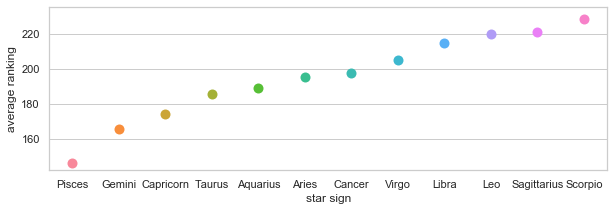

In [11]:
# villager's star sign vs. ranking
sns.set_theme(style="whitegrid")
ss_ranking_list = list()
for ss in df.groupby('sign'):
    ss_dict = dict()
    ss_dict['star sign'] = ss[0]
    ss_dict['average ranking'] = ss[1]['ranking'].mean()
    ss_ranking_list.append(ss_dict)
    print(f'{ss[0]}: {ss[1]["ranking"].mean()}')
df_ss_ranking = pd.DataFrame(ss_ranking_list)

plt.figure(figsize=(10, 3))
sns.swarmplot(x='star sign', y='average ranking', data=df_ss_ranking.sort_values('average ranking'), size=10)
plt.show()

6. **What did you Discover/what were your conclusions?**

    **(1) d.** The relations between villager's star sign and ranking was not clear from the first graph. However, it was clear after calculate the average ranking. 
    
    We can conclude that Pisces villagers are more popular than others, and Scorpio villagers are the least popular. 
    
    I'm surprised with this result since I didn't think the birthday (which determines the star signs) would affect villager's popularity since it was just set up by the game designer. Maybe it's just a coincidence. 

**(2) Correlation between popularity and times being mentioned in forum posts (trading section)**

In [12]:
# merge villagers' ranking into forum posts count dataframe
df2 = df_count.merge(df_ranking)
df2.head()

,name,count,ranking
0,Raymond,450,1
1,Marshal,466,2
2,Marina,591,3
3,Zucker,481,4
4,Sherb,350,5


correlation: -0.5621281845865875


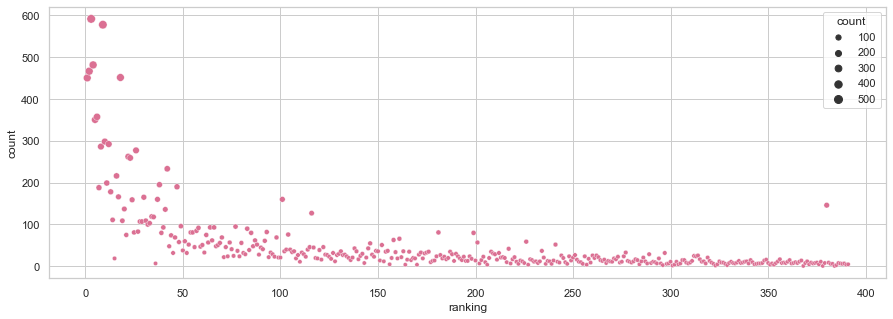

In [13]:
# print out the correlation between count and ranking
print(f"correlation: {df2['count'].corr(df2.ranking)}")

# plot forum posts count vs. ranking
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 5))
sns.scatterplot(x="ranking", y="count", data=df2, color='palevioletred', size="count")
plt.show()

6. **What did you Discover/what were your conclusions?**

    **(2)** From the graph, we can basically tell that the more popular the villager is, the more times the villager is mentioned in the posts. However, there are some exceptions, especially the villager ranking at 350-400 but mentioned in over 100 posts. This might due to the villager's low popularity, which makes players eager to giveaway this villager instead of keep it on their islands. (This villager has the least popular personality and star sign, so it make sense.)
    
    Also, the correlation is around -0.56. This means there's a moderate negative correlation between posts count and ranking. 

7. **What difficulties did you have in completing the project?**  

    (1) I was having trouble scraping the Nookazon website because of lacking ability to deal with anti-scraping. Thus, I have to change my data after I failed several tries. 
    
    (2) When I extracted the post titles from the forums, I waited about 30 minutes for the first time I tested my codes. It took a while for me to improve my codes and finally I made it to finish running within 15 minutes. It's probably not the most efficient but I was happy that I made some progress. 
    
    (3) I was trying to perform a factorial ANOVA for my first study purpose, but I failed to do so using python due to lack of knowledge.

8. **What skills did you wish you had while you were doing the project?**

    As I mentioned before, I wish I knew how to do a factorial ANOVA. This is one of the most appropriate analysis method for features in villagers_info data and it could help me find out which feature takes a bigger role when people decide their favorite villagers. 
    
    Also, I wish I had the skill to have better visualizations for the results instead of the simple plots. It could make my results more clear and easier to interpret. 

9. **What would you do “next” to expand or augment the project?** 

    I would like to do what I mentioned in quesiton 8. 
    
    If I was able to scrape the data from Nookazon, I would like to do what I originally purposed in milestone 1. I would find the pattern of how villagers' popularity incluence their trading price, and predict the prices of the villagers that have the default price (due to lack of trading records) on the website. 
    
    Beside those, I would like to build a model by the features of villagers after I learned the algorithms for building models. I could use the model to predict that if the villagers in other Animal Crossing series are introduced to Animal Crossing: New Horizons, how popular they would be. 